In [175]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

# diabetes 데이터

## a) 데이터 로드 및 처리

In [145]:
# 데이터 로드
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [146]:
'''
sklearn에 있는 당뇨병 진행도 데이터를 사용

<변수>
Age
Sex
Body mass index
Average blood pressure
S1: 혈청에 대한 6가지 지표들
S2
S3
S4
S5
S6

* 데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨

<데이터>
diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음 
'''

'\nsklearn에 있는 당뇨병 진행도 데이터를 사용\n\n<변수>\nAge\nSex\nBody mass index\nAverage blood pressure\nS1: 혈청에 대한 6가지 지표들\nS2\nS3\nS4\nS5\nS6\n\n* 데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨\n\n<데이터>\ndiabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음 \n'

## 설명변수

In [147]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [148]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [149]:
# array형으로 되어있으므로 다루기 쉽게 dataframe으로 바꿔준다.
df_x = pd.DataFrame(diabetes.data)
df_x.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## 종속변수

In [150]:
df_y = pd.DataFrame(diabetes.target, columns=['target'])
df_y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [151]:
df = pd.concat([df_x, df_y], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [152]:
# 442개의 관측치와 10개의 설명변수, 1개의 타겟변수로 이루어져 있다.
df.shape

(442, 11)

---
## b) EDA

In [153]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [154]:
'''
    [질문] age와 bmi는 describe만 보고 이산형/연속형으로 구분할 수 있는가?
    
    age: 이산형
    sex: 범주형
    bmi: 연속형
    bp:  연속형
    s1~6:연속형
'''

'\n    [질문] age와 bmi는 describe만 보고 이산형/연속형으로 구분할 수 있는가?\n    \n    age: 이산형\n    sex: 범주형\n    bmi: 연속형\n    bp:  연속형\n    s1~6:연속형\n'

# <과제>
이산형 데이터의 unique한 값이 58개밖에 없는데, 이를 적절하게 인코딩해보세요!



이 변수 그대로 사용해도 되고, 또는 (정확한 나이는 모르지만) 나이별 인코딩을 할 수 있을거에요

In [155]:
len(df.age.unique()) # 442개 중 unique 값 58개

58

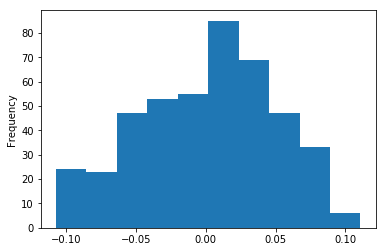

In [156]:
df.age.plot.hist()

In [157]:
'''
[순서형 인코딩 과제]
    나이 feature를 네 그룹(age_group)으로 나누어 인코딩 (4분위수 기준)
    - 1 : 25% 미만
    - 2 : 25% 이상 50% 미만
    - 3 : 50% 이상 75% 미만
    - 4 : 75% 초과

'''

pct_25 = np.percentile(df.age, 25)
pct_50 = np.percentile(df.age, 50)
pct_75 = np.percentile(df.age, 75)
print(pct_25, pct_50, pct_75)

-0.0372992664252317 0.00538306037424807 0.0380759064334241


In [158]:
df['age_group'] = 0
for idx, data in enumerate(df.age):
    if data < pct_25:
        df['age_group'][idx] = 1
    elif data < pct_50:
        df['age_group'][idx] = 2
    elif data < pct_75:
        df['age_group'][idx] = 3
    else:
        df['age_group'][idx] = 4

/Users/youngerous/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youngerous/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/youngerous/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/youngerous

In [159]:
df['age_group'].head(10)

0    4
1    2
2    4
3    1
4    3
5    1
6    1
7    4
8    4
9    1
Name: age_group, dtype: int64

In [160]:
# 명목형 인코딩
s_dummy = pd.get_dummies(df.sex, columns = ['sex0', 'sex1'])
s_dummy.columns = ['sex0', 'sex1']
s_dummy.head()

,sex0,sex1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [161]:
df.drop(['sex'], axis=1, inplace=True)

In [162]:
df = pd.concat([df, s_dummy], axis = 1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_group,sex0,sex1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,4,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,2,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,4,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,3,1,0


In [163]:
df_x = df.drop(['target'], axis=1) # target이 drop된 결과물을 반환
df_y = pd.DataFrame(df['target'], columns=['target']) # target feature를 저장

In [164]:
print(df_x.columns.values)
print(df_y.columns.values)

['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age_group' 'sex0' 'sex1']
['target']


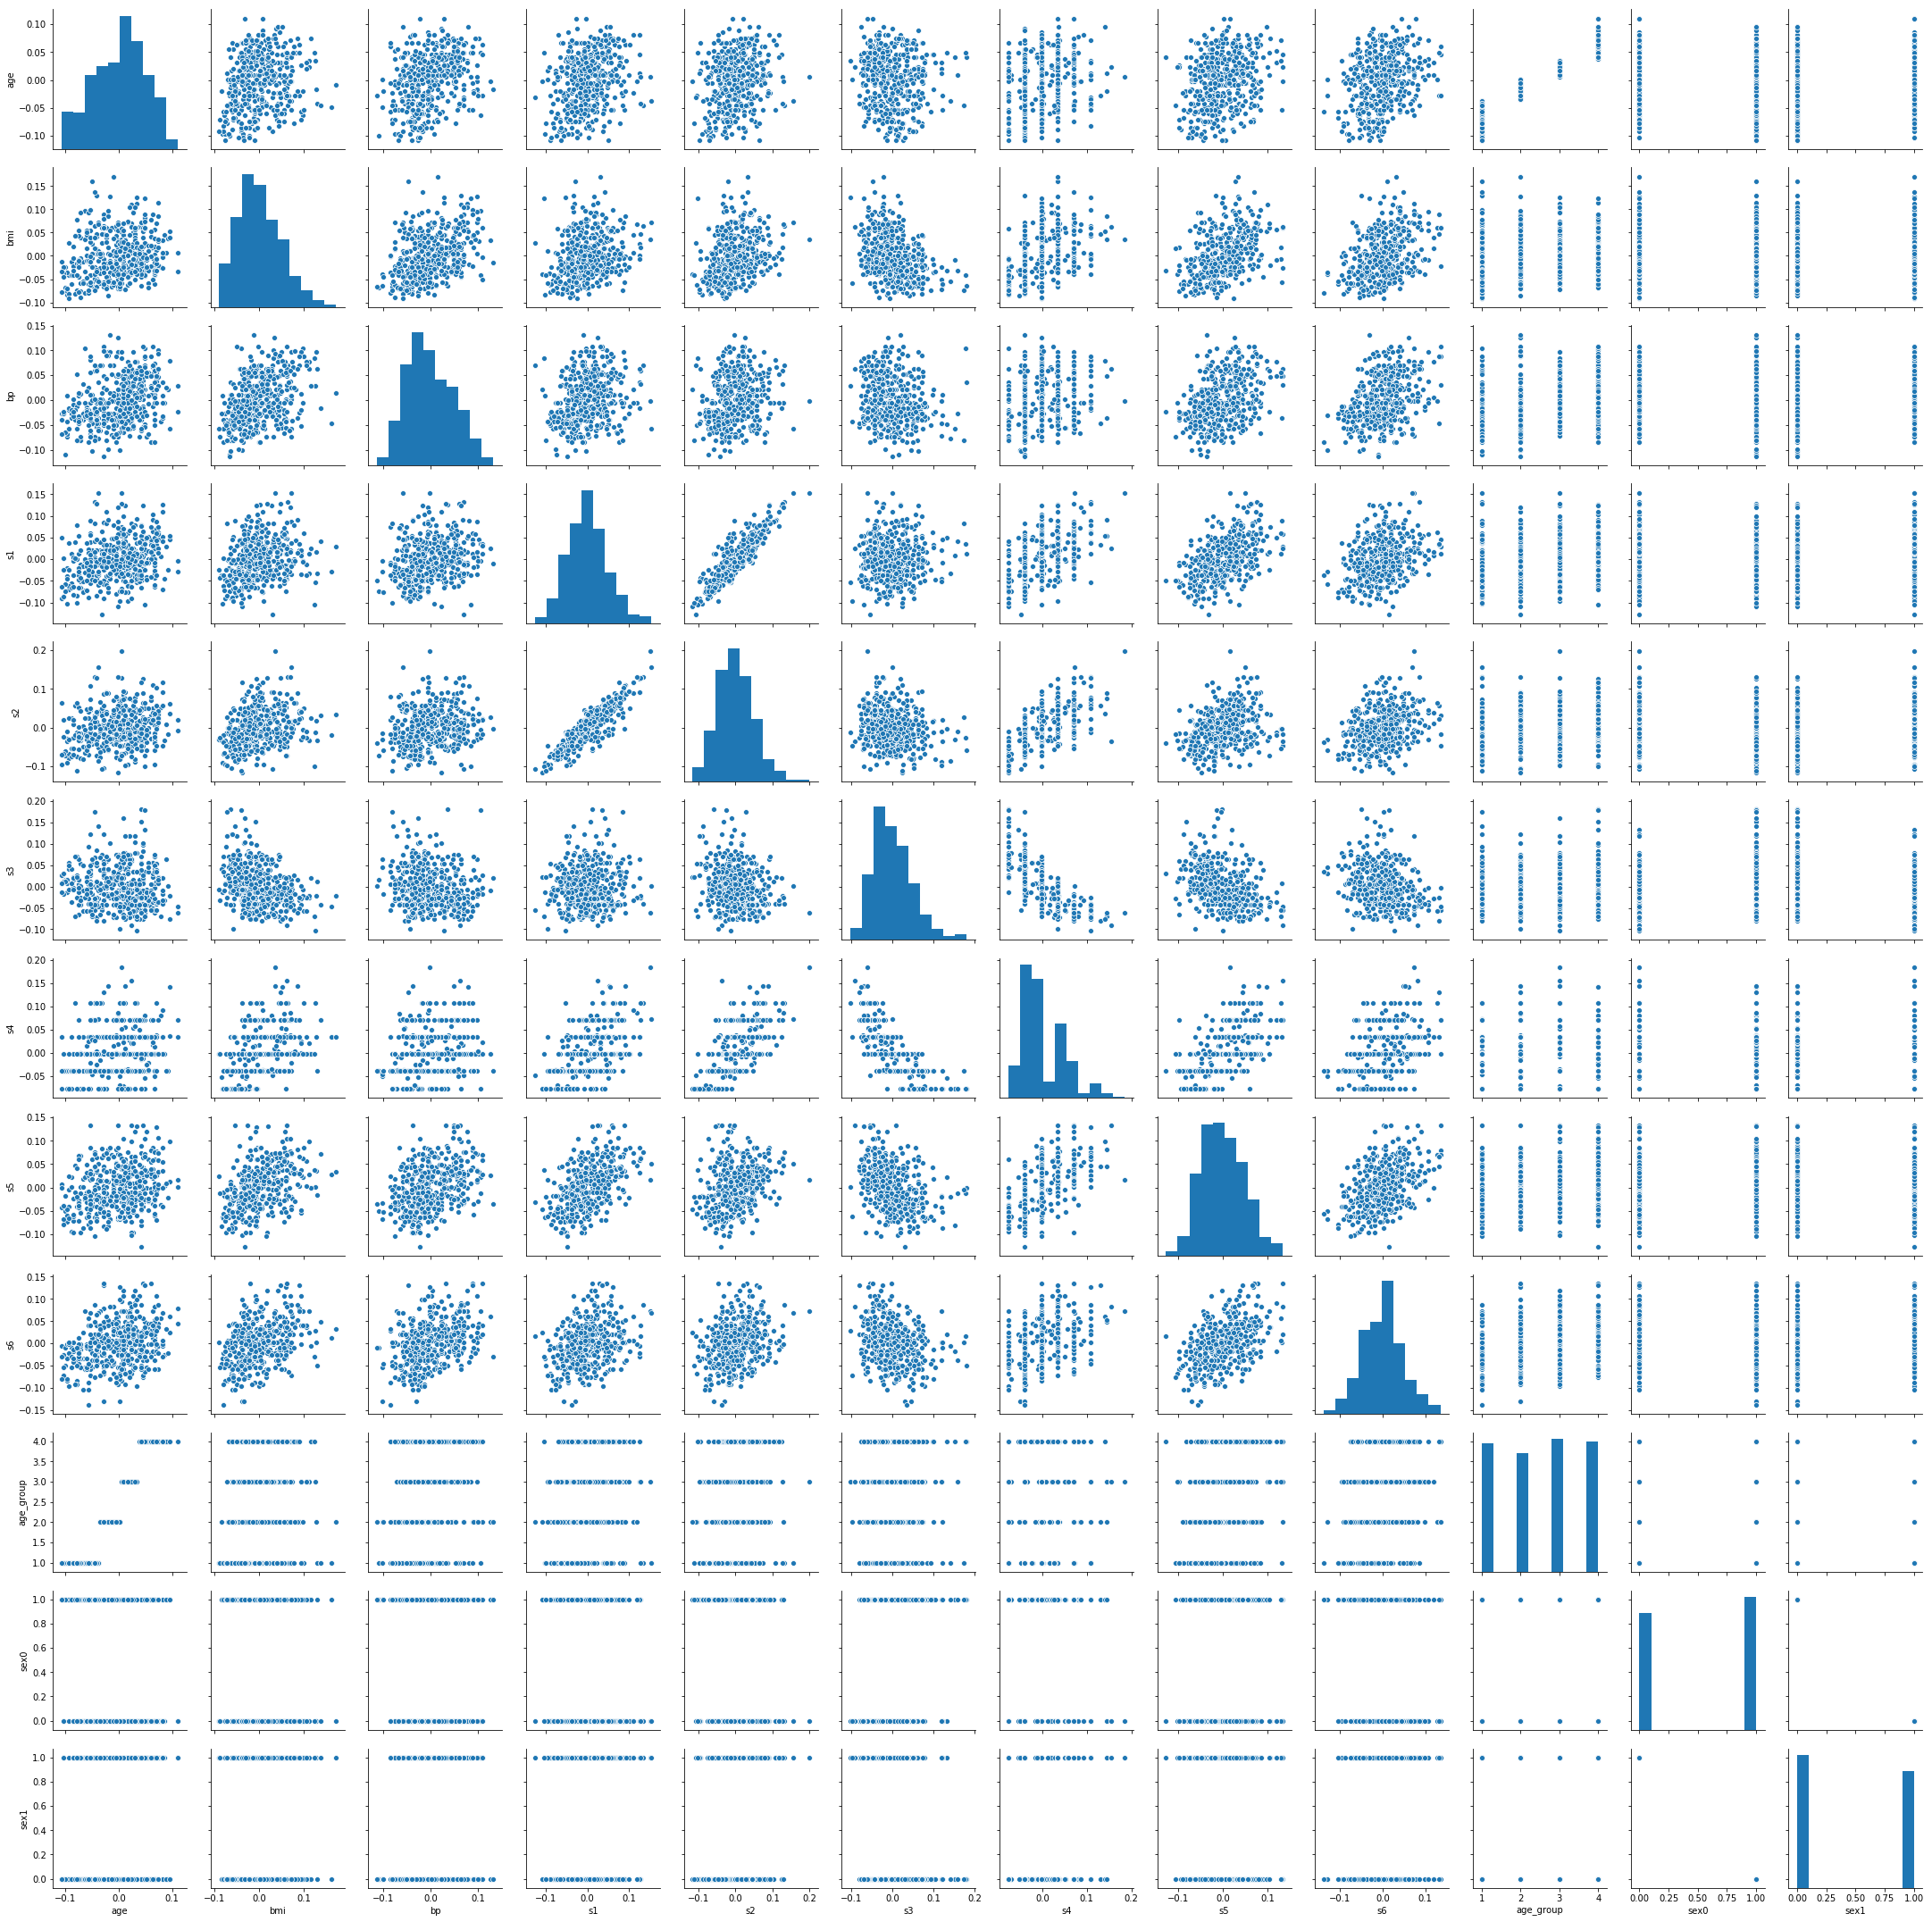

In [165]:
# 산점도 행렬
sns.pairplot(df_x)

- s1와 s2의 선형관계가 두드러짐 (다른 s 변수들도 살짝 보임)
- s4변수에서 이상한 줄무늬가 보인다.
- s4변수의 특성으로 특정 구간의 시작(끝)에 많을 수도 있고, 데이터 기입의 오류일 수도 있겠다.

In [166]:
# 상관계수 행렬
df_x.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,age_group,sex0,sex1
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.946976,-0.173737,0.173737
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.145906,-0.088161,0.088161
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.332480,-0.241013,0.241013
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.226217,-0.035277,0.035277
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.182445,-0.142637,0.142637
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.043136,0.379090,-0.379090
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.148382,-0.332115,0.332115
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.235193,-0.149918,0.149918
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.263678,-0.208133,0.208133
age_group,0.946976,0.145906,0.332480,0.226217,0.182445,-0.043136,0.148382,0.235193,0.263678,1.000000,-0.178652,0.178652


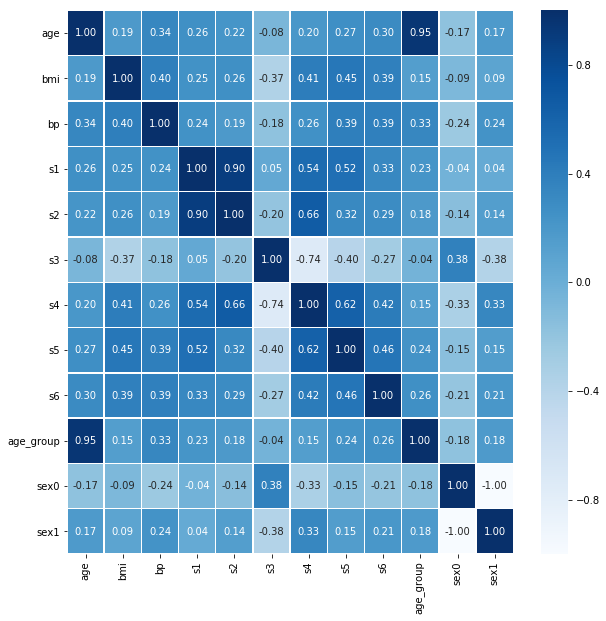

In [167]:
# 상관계수 행렬
plt.figure(figsize=(10,10))
sns.heatmap(data = df_x.corr(), annot=True,
           fmt = '.2f', linewidths=.5, cmap='Blues')

### (1) age_group이 없는 경우 vif 측정

In [169]:
# VIF(다중공선성) 확인하기: 초기 데이터
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_x_2 = df_x.drop(['age_group'],axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_x_2.values, i) for i in range(df_x_2.shape[1])]

vif['features'] = df_x_2.columns
vif.sort_values(['VIF Factor'], ascending=[False])

,VIF Factor,features
3,59.203786,s1
4,39.194379,s2
5,15.402352,s3
7,10.076222,s5
6,8.890986,s4
1,1.509446,bmi
8,1.484623,s6
2,1.459429,bp
0,1.217307,age
10,1.147844,sex1


age_group이 없는 기존 데이터의 경우 s1, s2, s3, s5가 다중공선성이 있다고 판단된다.

### (2) age_group이 있는 경우 vif 측정 - default 데이터

In [170]:
# VIF(다중공선성) 확인하기: age와 age_group 모두 존재 (default)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]

vif['features'] = df_x.columns
vif.sort_values(['VIF Factor'], ascending=[False])

,VIF Factor,features
3,59.216866,s1
4,39.194412,s2
10,27.543417,sex0
11,25.560068,sex1
5,15.419548,s3
0,10.282954,age
9,10.105338,age_group
7,10.076654,s5
6,8.988427,s4
1,1.515270,bmi


s1, s2, sex0, sex1, s3 age, age_group, s5 의 vif가 10 이상이므로 다중공선성이 있다고 판단된다.


age_group의 경우 age에서 비롯된 변수이기 때문에 당연히 다중공선성이 존재한다. <br/>
age_group의 추가로 sex0과 sex1의 다중공선성이 급격하게 증가하였다. <br/>
이 데이터로 뒤의 과정을 계속 할 예정이다.

### (3) age feature를 삭제하고 vif 측정

In [172]:
# VIF(다중공선성) 확인하기: age 삭제 후 age_group만 존재
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_x_3 = df_x.drop(['age'],axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_x_3.values, i) for i in range(df_x_3.shape[1])]

vif['features'] = df_x_3.columns
vif.sort_values(['VIF Factor'], ascending=[False])

,VIF Factor,features
2,59.192460,s1
3,39.185363,s2
4,15.389466,s3
6,10.074376,s5
5,8.911057,s4
10,4.297482,sex1
9,4.002061,sex0
0,1.510481,bmi
7,1.476942,s6
1,1.468711,bp


age를 삭제하고 age_group만을 사용한 결과 <br/>
다중공선성이 의심되는 변수가 다시 s1, s2, s3, s5로 좁혀졌다.

In [ ]:
'''
    다중공선성이 의심되는 변수를 삭제할 수도 있고, 일부만 제거할 수도 있음
'''

## c) Modeling

In [173]:
# train, test data 분할
# 참고) age_group이 포함된 data임
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)


In [178]:
from sklearn.linear_model import LinearRegression

# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [179]:
# fit된 모델의 R-square
model.score(x_train, y_train)

0.5599222407380899

In [180]:
# MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(x_train))

2697.9836793367654

> age_group 변수의 존재가 R-square를 높이고 MSE를 낮추었다.

In [183]:
print(model.coef_) # 추정된 회귀계수(intercept 제외)
print(model.intercept_) # intercept

[[-410.63287438  575.82990493  289.7299871  -686.04246901  330.79251024
    44.55510909  207.66571216  737.71648508   47.76299498   16.91274635
    12.04676159  -12.04676159]]
[109.25434761]


In [184]:
# test 데이터 예측
model.predict(x_test)

array([[239.28640037],
       [245.88501683],
       [173.76544936],
       [116.71834581],
       [187.06575472],
       [259.68330683],
       [114.92556772],
       [189.44230573],
       [143.80626793],
       [239.98417324],
       [178.29101617],
       [177.35278799],
       [107.56757405],
       [ 91.35624785],
       [246.16069447],
       [ 92.00383615],
       [153.81092999],
       [ 58.39032107],
       [108.29750793],
       [215.60052744],
       [197.62578999],
       [157.01065821],
       [165.00674171],
       [162.92434203],
       [202.21427316],
       [170.31497525],
       [125.40088352],
       [ 86.69786489],
       [192.85568449],
       [151.8643881 ],
       [181.08104601],
       [ 81.09401295],
       [147.90148214],
       [161.66876618],
       [149.42788632],
       [199.75311385],
       [166.80358925],
       [186.30343897],
       [129.60277208],
       [210.30760966],
       [ 80.4661923 ],
       [159.14956068],
       [142.77918113],
       [190

In [185]:
# test 데이터 R-square
model.score(x_test, y_test)

0.338517177324451

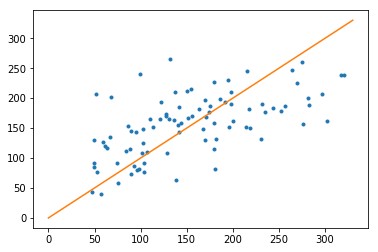

In [186]:
# 예측 vs. 실제 데이터 plot
y_pred = model.predict(x_test)
plt.plot(y_test, y_pred, '.')

# 예측과 실제와 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [187]:
'''
    MSE: 2697
    train R-square: 0.5599
    test R-square: 0.3385
'''

'\n    MSE: 2697\n    train R-square: 0.5599\n    test R-square: 0.3385\n'

In [188]:
# 다중공선성이 제일 큰 변수를 제거하고 다시 하기
df2 = df.drop(['s1'], axis=1)
df2.head()

,age,bmi,bp,s2,s3,s4,s5,s6,target,age_group,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,4,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,2,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,4,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,3,1,0


In [189]:
df2_x = df2.drop(['target'], axis=1)
df2_y = pd.DataFrame(df2['target'], columns = ['target'])
df2_x.head()

,age,bmi,bp,s2,s3,s4,s5,s6,age_group,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,4,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,2,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,4,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,3,1,0


In [190]:
# train, test data 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [191]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(x_train, y_train)

# fit된 모델의 R-square
model.score(x_train, y_train)

0.5567341855411274

In [192]:
# MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(x_train))

2717.5286818032746

In [193]:
# test 데이터 R-square
model.score(x_test, y_test)

0.32988539190299704

In [196]:
'''
    # s1 제거 이후           (제거 이전)
    MSE: 2717              (2697)
    train R-square: 0.5567 (0.5599)
    test R-square: 0.3298  (0.3385)
'''


'\n    # s1 제거 이후           (제거 이전)\n    MSE: 2717              (2697)\n    train R-square: 0.5567 (0.5599)\n    test R-square: 0.3298  (0.3385)\n'

다중공선성이 가장 큰 s1변수를 제거하고 회귀한 결과, <br/>
모델의 MSE가 증가하고 R-square가 증가하였기 때문에 <br/>
성능을 중시하기 위해서는 s1를 사용하는 것이 낫겠다.


높은 다중공선성으로 인한 회귀계수의 불안정화를 피하려면 s1을 제거해도 된다.

In [200]:
# 일단 성능을 위해 다시 s1을 포함시키자.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델 불러옴
model.fit(x_train, y_train) # train data에 fit시킴
model.score(x_train, y_train) # fit된 모델의 R-square

# MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(x_train))

print(model.coef_) # 추정된 회귀계수(intercept 제외)
print(model.intercept_) # intercept

model.predict(x_test) # test 데이터 예측
model.score(x_test, y_test) # test 데이터 R-square

[[-410.63287438  575.82990493  289.7299871  -686.04246901  330.79251024
    44.55510909  207.66571216  737.71648508   47.76299498   16.91274635
    12.04676159  -12.04676159]]
[109.25434761]


0.338517177324451

In [201]:
# Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

# alpha: 얼마나 정규화를 할 건지 정하는 양수 hyperparameter(클수록 더 정규화)
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [202]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [203]:
# R-square
ridge.score(x_train, y_train)

0.4726474059470136

In [204]:
# 정규화를 덜 하니까 R-square가 오히려 증가했다.
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)

0.5363728484904562

In [206]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)

0.3991686359873018

In [207]:
lasso = Lasso(alpha=0.3)
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)

0.5269679454406073

In [208]:
'''
정규화를 많이 하니 오히려 R-square가 감소했다.
overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것 같다.
더 복잡한 모델(다항회귀, DT 등)이 필요해 보인다.
'''

'\n정규화를 많이 하니 오히려 R-square가 감소했다.\noverfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것 같다.\n더 복잡한 모델(다항회귀, DT 등)이 필요해 보인다.\n'